In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from PIL import Image
from os.path import splitext

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [14]:
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
path='/kaggle/input/cityscapes-image-pairs'
def images_upload(path):
    images=[]
    for root,subfolders,files in os.walk(path):
        for file in tqdm(files):
            filename=root+os.sep+file
            if filename.endswith('jpg') or filename.endswith('png'):
                images.append(filename)                                                              
    return images
images=images_upload(path)
            

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 2975/2975 [00:00<00:00, 650101.82it/s]


In [18]:
def convert_image_rgb(data):
    imgs=[]
    for i in tqdm(data):
        img = cv2.imread(i, cv2.COLOR_BGR2RGB)
        del i
        imgs.append(img)
    return imgs 
img=convert_image_rgb(images)

100%|██████████| 6950/6950 [01:03<00:00, 109.75it/s]


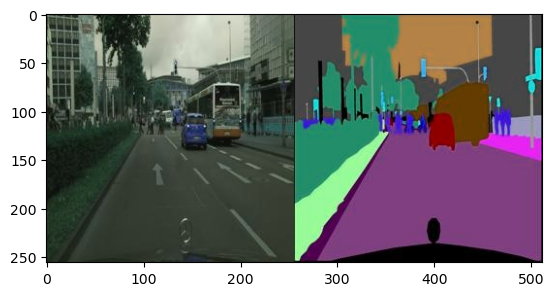

In [19]:
plt.imshow(img[np.random.randint(0,len(img))])

In [25]:
def split_input_mask(data):
    inputs=[]
    mask=[]
    for i in data:
        a=i[:,:256]
        inputs.append(a)
        b=i[:,256:]
        mask.append(b)
    return inputs,mask
inputs,mask=split_input_mask(img)
    

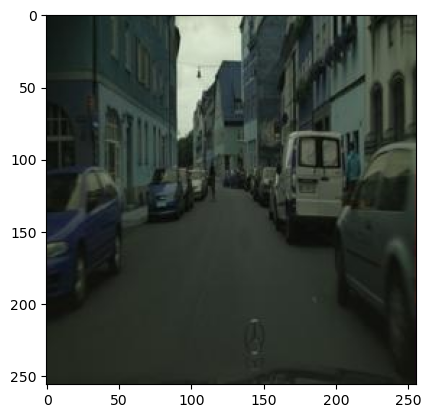

In [27]:
plt.imshow(inputs[np.random.randint(0,len(inputs))])

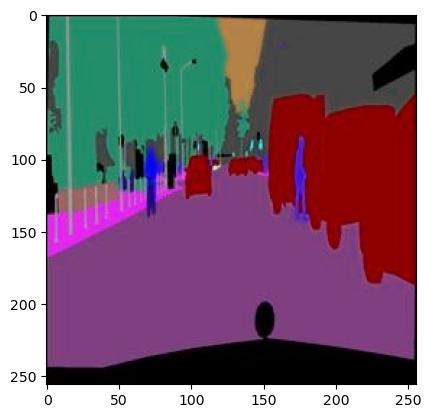

In [31]:
plt.imshow(mask[np.random.randint(0,len(mask))])

In [44]:
def new_labels(mask):
    num_items=1000
    color_array=np.random.choice(range(256),3*num_items).reshape(-1,3)
    num_classes=5
    label_model=KMeans(n_clusters=num_classes)
    label_model.fit(color_array)
    labels=[]
    for i in tqdm(range(len(mask))):
        label_class=label_model.predict(mask[i].reshape(-1,3)).reshape(256,256)
        labels.append(label_class)
    return labels
labels=new_labels(mask)
idx=np.random.randint(0,len(labels))
classes,freq=np.unique(labels[idx],return_counts=True)
print(f'number of classes :{len(classes)}')


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 6950/6950 [00:14<00:00, 481.05it/s]

number of classes :5


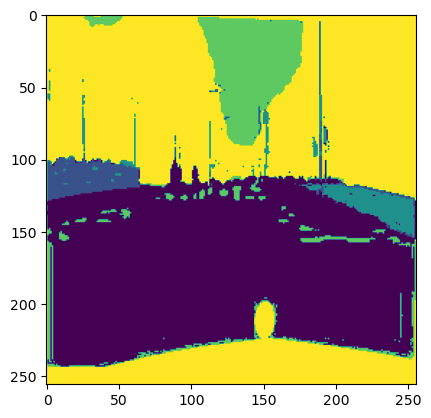

In [45]:
plt.imshow(labels[np.random.randint(0,len(labels))])

In [46]:
def rescale(data):
    rescaled=[]
    for i in tqdm(data):
        img=tf.image.convert_image_dtype(i,tf.float32)
        del i
        rescaled.append(img)
    return rescaled
rescaled_input=rescale(inputs)

100%|██████████| 6950/6950 [00:07<00:00, 877.15it/s]


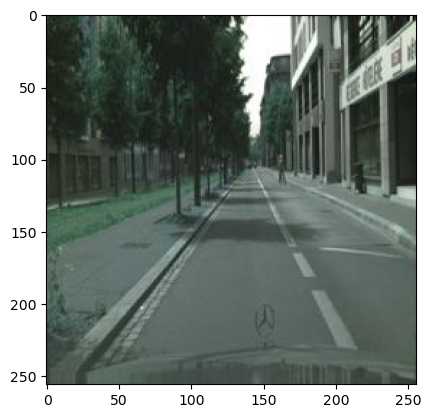

In [47]:
plt.imshow(rescaled_input[np.random.randint(0,len(rescaled_input))])

In [ ]:
def build_model=